# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data files will be in the canvas assignment, merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
#Load data and separate NBA
salary_data = pd.read_csv('2025_salaries.csv', header=1, encoding='latin-1')
stats = pd.read_csv('nba_2025.txt', sep = ",", encoding='latin-1')

stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,1.0,Shai Gilgeous-Alexander,27.0,OKC,PG,49.0,49.0,1632.0,534.0,964.0,...,218.0,314.0,64.0,38.0,103.0,101.0,1558.0,0.0,NaN,gilgesh01
1,2.0,Tyrese Maxey,25.0,PHI,PG,52.0,52.0,2008.0,524.0,1117.0,...,214.0,351.0,102.0,40.0,126.0,118.0,1503.0,0.0,NaN,maxeyty01
2,3.0,Donovan Mitchell,29.0,CLE,SG,51.0,51.0,1719.0,516.0,1060.0,...,229.0,302.0,79.0,15.0,159.0,125.0,1478.0,0.0,NaN,mitchdo01
3,4.0,Jaylen Brown,29.0,BOS,SF,49.0,49.0,1676.0,534.0,1105.0,...,336.0,229.0,49.0,20.0,176.0,136.0,1435.0,2.0,NaN,brownja02
4,5.0,Luka DonÄiÄ,26.0,LAL,PG,42.0,42.0,1492.0,437.0,923.0,...,329.0,360.0,61.0,19.0,179.0,102.0,1379.0,6.0,NaN,doncilu01


In [4]:
#View salaries
salary_data.head()

,Player,Tm,2025-26
0,Jaden Springer,NOP,"$70,732"
1,Garrison Mathews,IND,"$131,970"
2,Garrison Mathews,IND,"$131,970"
3,Mac McClung,IND,"$164,060"
4,Didi Louzada,POR,"$268,032"


In [5]:
#Clean player names
salary_data["Player"] = (salary_data["Player"].str.strip())

stats["Player"] = (stats["Player"].str.strip())

In [6]:
#Merge data
merged_data = pd.merge(salary_data, stats, on='Player')
merged_data.head()

,Player,Tm,2025-26,Rk,Age,Team,Pos,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
1,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
2,Mac McClung,IND,"$164,060",459.0,27.0,2TM,SG,4.0,0.0,47.0,...,5.0,2.0,5.0,2.0,3.0,8.0,23.0,0.0,NaN,mccluma01
3,Mac McClung,IND,"$164,060",459.0,27.0,IND,SG,3.0,0.0,34.0,...,4.0,1.0,5.0,1.0,2.0,6.0,19.0,0.0,NaN,mccluma01
4,Mac McClung,IND,"$164,060",459.0,27.0,CHI,SG,1.0,0.0,13.0,...,1.0,1.0,0.0,1.0,1.0,2.0,4.0,0.0,NaN,mccluma01


In [7]:
#Drop variables that will not be needed or are duplicates
duplicates = merged_data[merged_data.duplicated(subset='Player', keep=False)]
print(duplicates)

merged_data = merged_data.drop_duplicates(subset='Player', keep='first')
print(merged_data)

#% shots made FG%, total points PTS, total assists AST, Salary, Player, POS, how many times ball rebounded TRB
#C less pts but more trb

                     Player   Tm    2025-26     Rk   Age Team Pos     G   GS  \
0          Garrison Mathews  IND  $131,970   398.0  29.0  IND  SG  15.0  1.0   
1          Garrison Mathews  IND  $131,970   398.0  29.0  IND  SG  15.0  1.0   
2               Mac McClung  IND  $164,060   459.0  27.0  2TM  SG   4.0  0.0   
3               Mac McClung  IND  $164,060   459.0  27.0  IND  SG   3.0  0.0   
4               Mac McClung  IND  $164,060   459.0  27.0  CHI  SG   1.0  0.0   
..                      ...  ...        ...    ...   ...  ...  ..   ...  ...   
518  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  IND  PF  17.0  3.0   
519  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  DAL  PF   5.0  0.0   
520  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  2TM  PF  22.0  3.0   
521  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  IND  PF  17.0  3.0   
522  Jeremiah Robinson-Earl  IND        NaN  383.0  25.0  DAL  PF   5.0  0.0   

        MP  ...    TRB   AST  STL  BLK 

In [8]:
#Clean Salary
merged_data["Salary"] = (
    merged_data["2025-26"]
    .astype(str)                      
    .str.strip()                      
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float))              

In [9]:
#Identify features to cluster
features = ['Salary', 'PTS', 'TRB', 'AST', 'MP']

df_model = merged_data[features].dropna()

In [10]:
#Clean salary
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

In [11]:
#Run the clustering algo with your best guess for K
#Model
kmeans = KMeans(n_clusters=3, random_state=42)
#Fit model to training data
kmeans.fit(scaled_data)
#Predict
clusters = kmeans.predict(scaled_data)
#Add clusters labels to df

df_model["Cluster"] = clusters

df_model.head()

,Salary,PTS,TRB,AST,MP,Cluster
0,131970.0,78.0,17.0,10.0,196.0,0
2,164060.0,23.0,5.0,2.0,47.0,0
5,321184.0,18.0,7.0,9.0,65.0,0
6,706898.0,22.0,11.0,0.0,49.0,0
7,1000000.0,13.0,8.0,3.0,58.0,0


In [12]:
#View the results
df_model.groupby("Cluster").mean()

,Salary,PTS,TRB,AST,MP
Cluster,,,,,
0,5.777149e+06,139.852273,63.579545,32.357955,382.181818
1,3.194910e+07,961.090909,281.681818,228.287879,1560.757576
2,1.135567e+07,505.757396,205.337278,108.976331,1117.650888


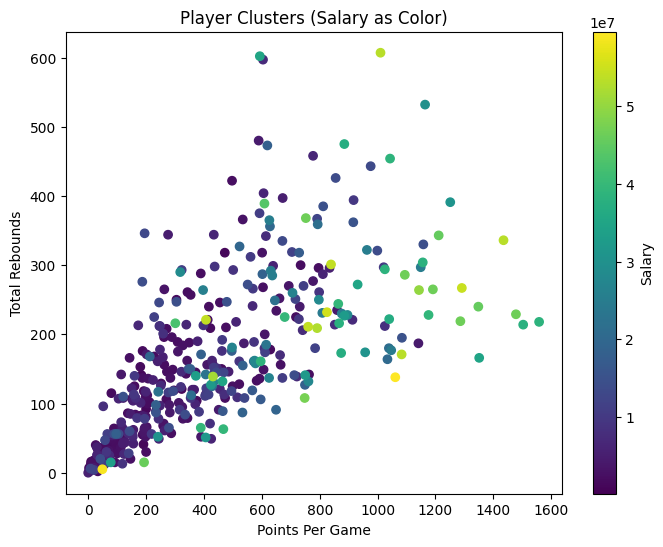

In [13]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df_model["PTS"],
    df_model["TRB"],
    c=df_model["Salary"]
)

plt.colorbar(scatter, label="Salary")
plt.xlabel("Points Per Game")
plt.ylabel("Total Rebounds")
plt.title("Player Clusters (Salary as Color)")
plt.show()

In [14]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(scaled_data, labels))

print("Total Variance for k=2-10:", inertias)
print("Silhouette Scores for k=2-10:", sil_scores)
print("Model Score for k=10:", km.score(scaled_data))

Total Variance for k=2-10: [1036.4827319183894, 774.2649742019919, 638.4770217410694, 546.2130386932928, 480.2607934503661, 440.4795733511084, 403.6844278220907, 377.1163728627534, 354.63182667738164]
Silhouette Scores for k=2-10: [0.4398404976650265, 0.37190637954782596, 0.3396535807637179, 0.35098660562821066, 0.3446925408957463, 0.3439994684080178, 0.29149861019433226, 0.28426692621377064, 0.29068661901050796]
Model Score for k=10: -354.63182667738164


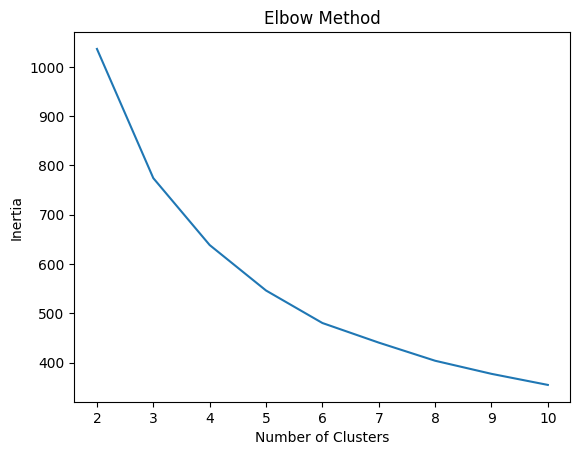

In [15]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient
plt.plot(k_range, inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

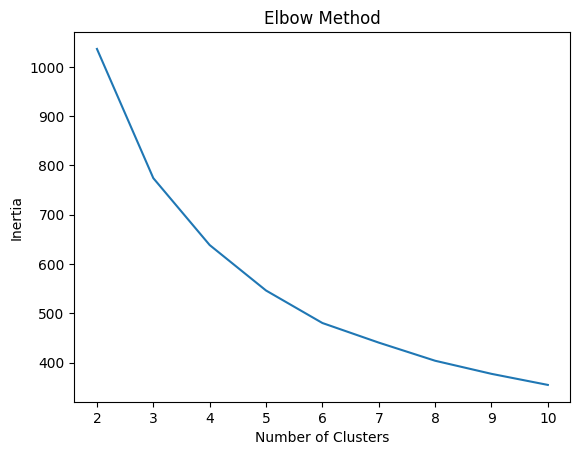

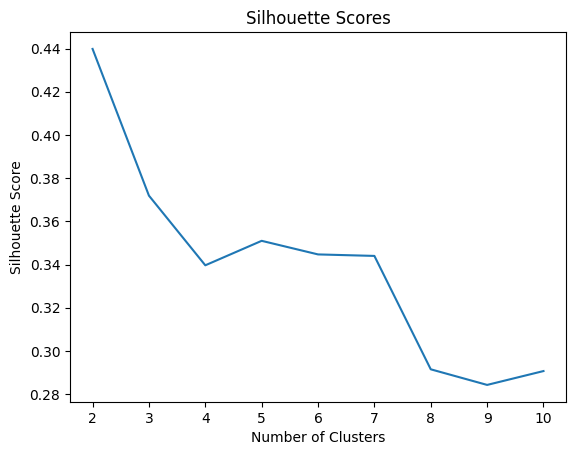

In [16]:
#Visualize the results of the elbow method
plt.plot(k_range, inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

plt.plot(k_range, sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

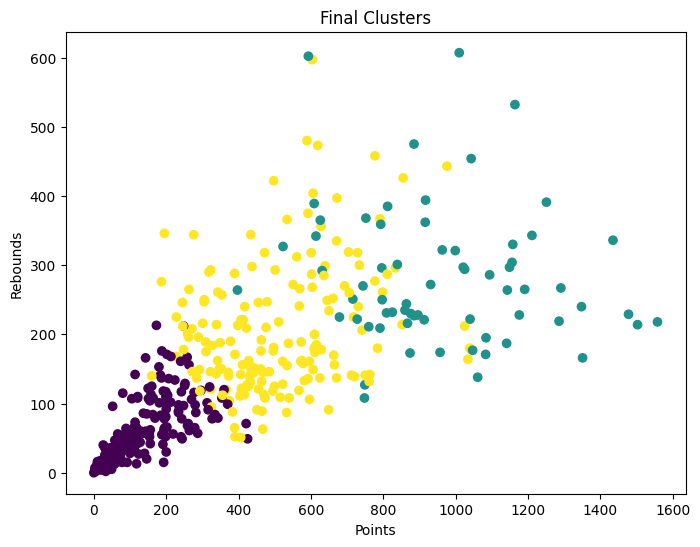

In [17]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results
kmeans_final = KMeans(n_clusters=3, random_state=42)
df_model["Cluster_Final"] = kmeans_final.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(
    df_model["PTS"],
    df_model["TRB"],
    c=df_model["Cluster_Final"]
)
plt.xlabel("Points")
plt.ylabel("Rebounds")
plt.title("Final Clusters")
plt.show()

In [18]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
print("Final Inertia:", kmeans_final.inertia_)
print("Final Silhouette:", silhouette_score(scaled_data, df_model["Cluster_Final"]))

Final Inertia: 774.2649742019919
Final Silhouette: 0.37190637954782596


In [19]:
#Bring back player names
df_model = df_model.merge(
    merged_data[["Player"]],
    left_index=True,
    right_index=True
)

In [20]:
#Use the model to select players for Mr. Rooney to consider
df_model["Cluster_Avg_Salary"] = df_model.groupby("Cluster_Final")["Salary"].transform("mean")

df_model["Salary_Diff"] = df_model["Salary"] - df_model["Cluster_Avg_Salary"]

df_model["Value_Label"] = np.where(
    df_model["Salary_Diff"] < 0,
    "Underpaid",
    "Overpaid"
)

df_model.sort_values("Salary_Diff").head()

#Backup
df_model.sort_values("Salary_Diff").iloc[4:8]

,Salary,PTS,TRB,AST,MP,Cluster,Cluster_Final,Player,Cluster_Avg_Salary,Salary_Diff,Value_Label
284,7707709.0,614.0,342.0,327.0,1780.0,1,1,Dyson Daniels,3.194910e+07,-2.424139e+07,Underpaid
316,9560520.0,728.0,222.0,307.0,1327.0,1,1,Stephon Castle,3.194910e+07,-2.238858e+07,Underpaid
318,9690600.0,917.0,394.0,281.0,1937.0,1,1,Amen Thompson,3.194910e+07,-2.225850e+07,Underpaid
321,10015680.0,1021.0,297.0,192.0,1734.0,1,1,Kon Knueppel,3.194910e+07,-2.193342e+07,Underpaid


In [21]:
#Not good
df_model[df_model["Value_Label"] == "Overpaid"] \
    .sort_values("Salary_Diff", ascending=False) \
    .head(4)

,Salary,PTS,TRB,AST,MP,Cluster,Cluster_Final,Player,Cluster_Avg_Salary,Salary_Diff,Value_Label
511,59020270.0,49.0,5.0,10.0,121.0,0,0,Bradley Beal,5.777149e+06,5.324312e+07,Overpaid
508,54126450.0,407.0,221.0,56.0,626.0,2,2,Anthony Davis,1.135567e+07,4.277078e+07,Overpaid
501,51666090.0,431.0,139.0,100.0,824.0,2,2,Paul George,1.135567e+07,4.031042e+07,Overpaid
493,45999660.0,193.0,15.0,89.0,280.0,0,0,Trae Young,5.777149e+06,4.022251e+07,Overpaid


In [22]:
#Good
df_model[df_model["Value_Label"] == "Underpaid"] \
    .sort_values("Salary_Diff") \
    .head(4)

,Salary,PTS,TRB,AST,MP,Cluster,Cluster_Final,Player,Cluster_Avg_Salary,Salary_Diff,Value_Label
96,2296274.0,796.0,296.0,342.0,1521.0,1,1,Russell Westbrook,3.194910e+07,-2.965283e+07,Underpaid
180,4000000.0,860.0,235.0,278.0,1633.0,1,1,Ryan Rollins,3.194910e+07,-2.794910e+07,Underpaid
187,4278960.0,1141.0,187.0,313.0,1629.0,1,1,Keyonte George,3.194910e+07,-2.767014e+07,Underpaid
275,7232143.0,913.0,221.0,283.0,1732.0,1,1,Payton Pritchard,3.194910e+07,-2.471696e+07,Underpaid


In [23]:
#Write up the results in a separate notebook with supporting visualizations and 
#an overview of how and why you made the choices you did. This should be at least 
#500 words and should be written for a non-technical audience.